<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [36]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [37]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [38]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [39]:
boston_df=pd.read_csv(boston_url)

In [41]:
# Correlation between columns
boston_df.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [40]:
chas_groups=boston_df.groupby('CHAS')['MEDV']
t_stat_chas,p_val_chas=stats.ttest_ind(chas_groups.get_group(0),chas_groups.get_group(1))
print(f"CHAS T-test: T-statistic={t_stat_chas:.4f}, P-value={p_val_chas:.4f}")


CHAS T-test: T-statistic=-3.9964, P-value=0.0001


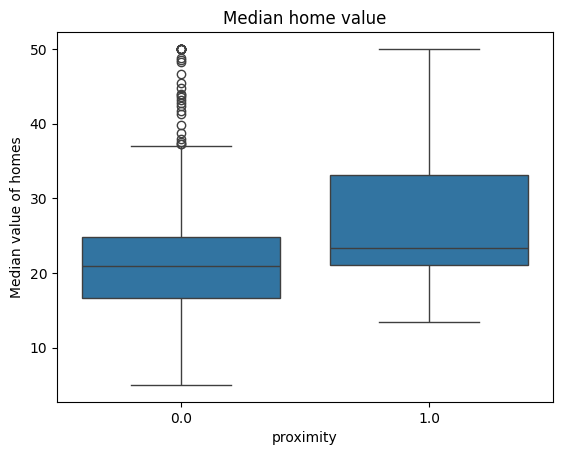

In [6]:
sns.boxplot(x='CHAS',y='MEDV',data=boston_df)
pyplot.title('Median home value')
pyplot.xlabel('proximity')
pyplot.ylabel('Median value of homes')
pyplot.show()

In [10]:
boston_df['AGE_GROUP']=pd.cut(boston_df['AGE'],bins=[0,35,70,100],labels=['Young','Middle-aged','Old'])
anova_model=ols('MEDV ~ AGE_GROUP',data=boston_df).fit()
anova_table=sm.stats.anova_lm(anova_model,typ=2)
print("\nANOVA for AGE_GROUP:")
print(anova_table)


ANOVA for AGE_GROUP:
                 sum_sq     df         F        PR(>F)
AGE_GROUP   5401.731883    2.0  36.40765  1.710501e-15
Residual   37314.563532  503.0       NaN           NaN


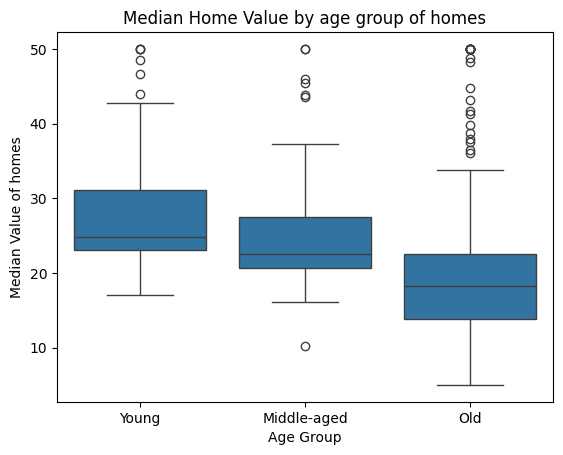

In [11]:
sns.boxplot(x='AGE_GROUP',y='MEDV',data=boston_df)
pyplot.title('Median Home Value by age group of homes')
pyplot.xlabel('Age Group')
pyplot.ylabel('Median Value of homes')
pyplot.show()

In [12]:
corr_nox_indus,p_val_nox_indus=stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])
print(f"\nCorrelation between NOX and INDUS: r ={corr_nox_indus:.4f},P-value={p_val_nox_indus:.4f}")


Correlation between NOX and INDUS: r =0.7637,P-value=0.0000


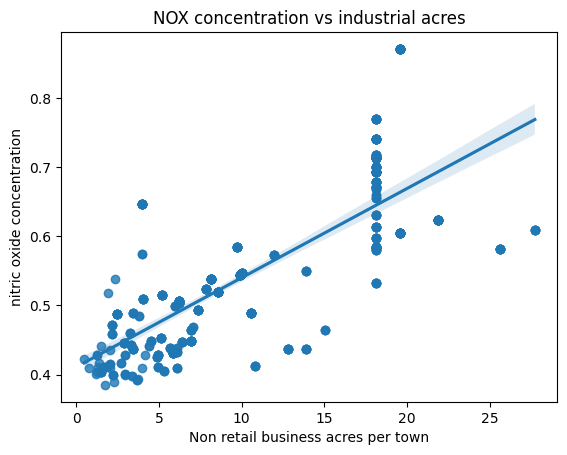

In [13]:
sns.regplot(x='INDUS',y='NOX',data=boston_df)
pyplot.title('NOX concentration vs industrial acres')
pyplot.xlabel('Non retail business acres per town')
pyplot.ylabel('nitric oxide concentration')
pyplot.show()

In [14]:
corr_dis_medv,p_val_dis_medv=stats.pearsonr(boston_df['DIS'],boston_df['MEDV'])
print(f"\nCorrelation between DIS and MEDV: r ={corr_dis_medv:.4f},P-value={p_val_dis_medv:.4f}")


Correlation between DIS and MEDV: r =0.2499,P-value=0.0000


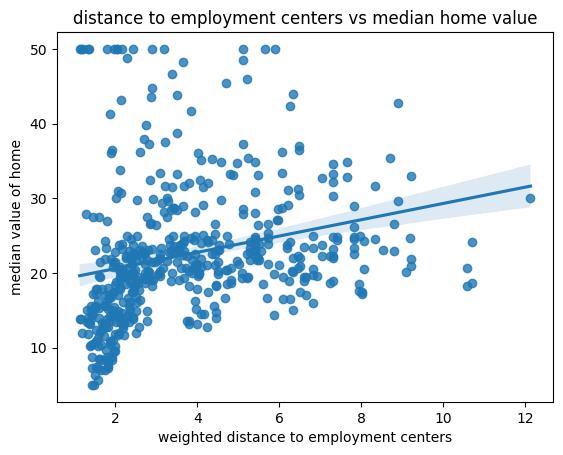

In [15]:
sns.regplot(x='DIS',y='MEDV',data=boston_df)
pyplot.title('distance to employment centers vs median home value')
pyplot.xlabel('weighted distance to employment centers')
pyplot.ylabel('median value of home')
pyplot.show()

In [16]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  AGE GROUP   506 non-null    category
 15  AGE_GROUP   506 non-null    category
dtypes: category(2), float64(13), int64(1)
memory usage: 56.6 KB


In [17]:
boston_df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
AGE GROUP     0
AGE_GROUP     0
dtype: int64

In [19]:
boston_df.duplicated().sum()

0

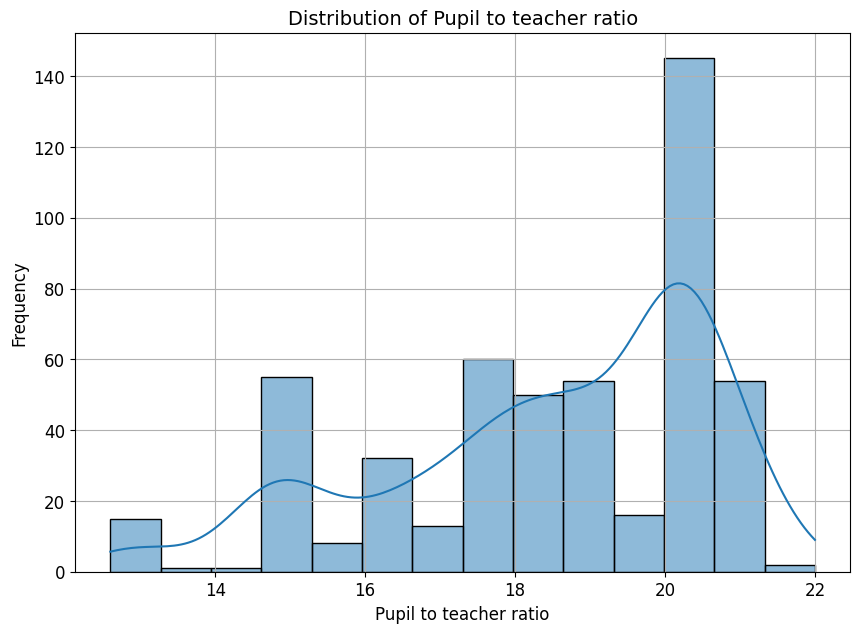

In [22]:
# Create the histogram with KDE
pyplot.figure(figsize=(10, 7))
ax = sns.histplot(boston_df['PTRATIO'], bins='auto', kde=True)

# Add labels and a title
pyplot.xlabel('Pupil to teacher ratio', fontsize=12)
pyplot.ylabel('Frequency', fontsize=12)
pyplot.title('Distribution of Pupil to teacher ratio', fontsize=14)

# Customize the ticks
pyplot.xticks(fontsize=12)
pyplot.yticks(fontsize=12)

# Grid
pyplot.grid(True)

# Show the plot
pyplot.show()

In [31]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [27]:
stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [29]:
f_statistic, p_value = stats.f_oneway(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [30]:
stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [33]:

X = boston_df['DIS']  # Independent variable (DIS)
y = boston_df['MEDV']  # Dependent variable (MEDV)

X = sm.add_constant(X)

# regression analysis
model1 = sm.OLS(y, X).fit()

# regression results
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 26 Aug 2025   Prob (F-statistic):           1.21e-08
Time:                        16:33:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0